# Assignment 04 - Housing Price Prediction using Neural Network

## Task 01: Predict Housing Prices using a Neural Network
**Objective:** Train a neural network model to predict housing prices using a structured dataset.

**Dataset:** [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)


### Step 1: Import Required Libraries

In [13]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [14]:
import tensorflow as tf
print(tf.__version__)


2.19.0


### Step 2: Load and Inspect the Dataset

In [15]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 3: Data Preprocessing
- Convert categorical columns using label encoding or one-hot encoding
- Normalize the features

In [16]:
# Encode categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 4: Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

### Step 5: Build Neural Network Model

In [ ]:
# Step 5: Build an Improved Neural Network
# Build Model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Linear activation for regression
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


d:\OneDrive - Higher Education Commission\Education\CyberGen\Assignment 4\deeplearning_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the Model

In [19]:
# Step 6: Train the Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=500,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 27382845014016.0000 - mean_absolute_error: 4869588.0000 - val_loss: 24168462548992.0000 - val_mean_absolute_error: 4623426.5000 - learning_rate: 0.0010
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 26115261333504.0000 - mean_absolute_error: 4774158.5000 - val_loss: 24168424800256.0000 - val_mean_absolute_error: 4623422.5000 - learning_rate: 0.0010
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 25904044572672.0000 - mean_absolute_error: 4754167.5000 - val_loss: 24168328331264.0000 - val_mean_absolute_error: 4623413.0000 - learning_rate: 0.0010
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 26487579213824.0000 - mean_absolute_error: 4790701.0000 - val_loss: 24168118616064.0000 - val_mean_absolute_error: 4623391.5000 - learning_rate: 0.0010
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24318933204992.0000 - mean_absolute_error: 4644954.0000 - val_loss: 24167699185664.0000 - va

### Step 7: Evaluate the Model

In [20]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Mean Squared Error (MSE): 1418770120704.0
Mean Absolute Error (MAE): 897828.8125
R² Score: 0.6946454644203186


### Step 8: Plot Training History

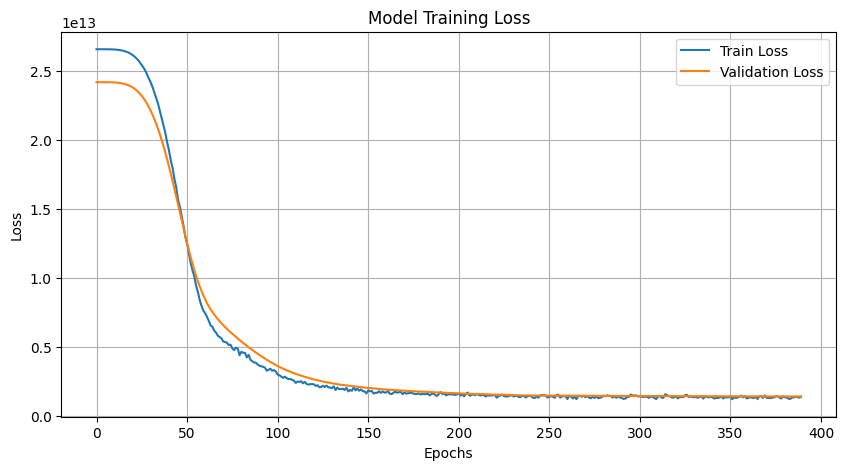

In [21]:
# Step 8: Plot Loss Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Training Loss")
plt.legend()
plt.grid(True)
plt.show()
